# **1. Pendahuluan**

Machine Learning memiliki berbagai model, salah satunya adalah Linear Regression, yang digunakan untuk memprediksi variabel numerik. Dalam laporan ini, kita akan menggunakan Linear Regression dari Scikit-learn untuk memprediksi symboling pada dataset Automobile.csv.

# **2. Data dan Persiapan Awal**
Dataset yang digunakan adalah Automobile.csv, yang memiliki 205 baris dan 26 kolom. Target variabel adalah symboling, dan fitur-fitur numerik yang digunakan antara lain:

* highway-mpg
* city-mpg
* peak-rpm
* horsepower
* compression-ratio
* stroke
* bore
* engine-size
* curb-weight
* height
* width
* length
* wheel-base

Dataset memiliki beberapa missing values, yang telah dihapus sebelum analisis.

# **3. Upload Dataset**

Langkah pertama adalah mengunggah dataset ke Google Colab agar bisa digunakan:

In [ ]:
from google.colab import drive

# Hubungkan Google Drive
drive.mount('/content/drive')

# Baca file dari Google Drive
file_path = "/content/drive/My Drive/Automobile.csv"
df = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


  # **4. Pemrosesan Data**

  Sebelum membangun model, kita perlu membersihkan data. Misalnya, menghapus baris yang mengandung missing values agar model bisa bekerja dengan baik.


In [ ]:
# Hapus data yang memiliki missing values pada fitur penting
df_clean = df.dropna(subset=['price', 'peak-rpm', 'horsepower', 'stroke', 'bore', 'num-of-doors', 'normalized-losses'])


Selanjutnya, kita pilih fitur numerik yang akan digunakan untuk membangun model:



In [ ]:
# Pilih fitur numerik yang relevan
numerical_features = ['highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower', 'compression-ratio',
                      'stroke', 'bore', 'engine-size', 'curb-weight', 'height', 'width', 'length', 'wheel-base']

# Definisikan X (features) dan y (target)
X = df_clean[numerical_features]
y = df_clean['symboling']


# **5. Pembagian Data Training dan Testing**

Sebelum membuat model, kita harus membagi dataset menjadi training set dan test set.



In [ ]:
from sklearn.model_selection import train_test_split

# Bagi dataset menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **6. Pembuatan Model Linear Regression**

Sekarang kita buat model regresi linear menggunakan Scikit-learn:



In [ ]:
from sklearn.linear_model import LinearRegression

# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model menggunakan data training
model.fit(X_train, y_train)


LinearRegression()

Setelah model dilatih, kita bisa menampilkan koefisien regresi dan intersep:




In [ ]:
# Menampilkan koefisien regresi
print("Intercept:", model.intercept_)
print("Koefisien:", model.coef_)

# Menampilkan koefisien dalam bentuk dataframe agar lebih mudah dibaca
coeff_df = pd.DataFrame(model.coef_, index=numerical_features, columns=["Koefisien"])
print(coeff_df)


Intercept: 10.528516826891567
Koefisien: [ 1.37588578e-01 -1.72689647e-01  1.07688111e-04  1.89140335e-03
  3.24575185e-02 -4.17196128e-01 -9.02110229e-01  5.39036748e-03
 -3.28692591e-05 -8.89070199e-02  2.23193628e-01  6.15458525e-04
 -1.72272631e-01]
                   Koefisien
highway-mpg         0.137589
city-mpg           -0.172690
peak-rpm            0.000108
horsepower          0.001891
compression-ratio   0.032458
stroke             -0.417196
bore               -0.902110
engine-size         0.005390
curb-weight        -0.000033
height             -0.088907
width               0.223194
length              0.000615
wheel-base         -0.172273


Koefisien ini menunjukkan pengaruh setiap fitur terhadap symboling.



# **7. Evaluasi Model**
Setelah model dibuat, kita evaluasi menggunakan Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R-squared (R²).

Rumus Evaluasi Model:

* Mean Squared Error (MSE):

  $MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$

  MSE mengukur seberapa besar kesalahan model, semakin kecil semakin baik.
* Root Mean Squared Error (RMSE):

  $RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2}$

  RMSE adalah akar kuadrat dari MSE, memberikan ukuran kesalahan dalam satuan yang sama dengan variabel target.
* R-squared (R²):

  $R^2 = 1 - \frac{\sum (y_i - \hat{y_i})^2}{\sum (y_i - \bar{y})^2}$

  R² mengukur sejauh mana model menjelaskan variabilitas data, semakin mendekati 1, semakin baik.






In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prediksi nilai symboling pada data uji
y_pred = model.predict(X_test)

# Hitung MSE, RMSE, dan R²
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Cetak hasil evaluasi
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 0.9297
Root Mean Squared Error (RMSE): 0.9642
R-squared (R²): 0.3666


# **8. Visualisasi Prediksi vs Nilai Asli**

Agar lebih mudah dipahami, kita buat scatter plot untuk membandingkan nilai asli vs prediksi:


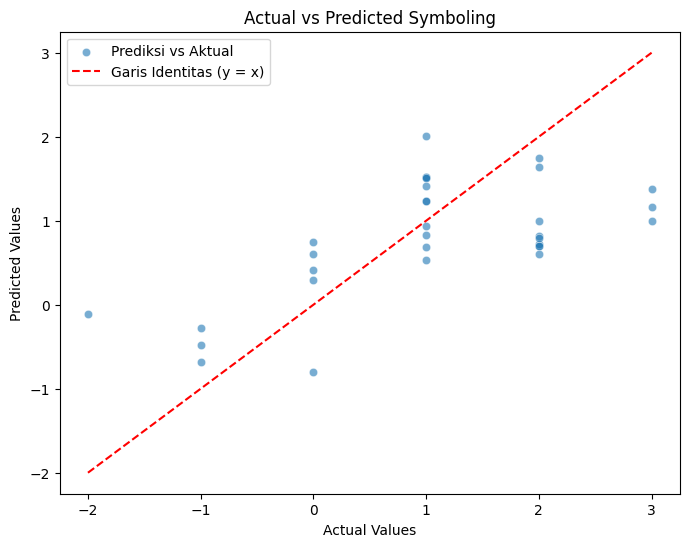

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Membuat scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, label="Prediksi vs Aktual")

# Menambahkan garis diagonal (y = x) untuk referensi
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Garis Identitas (y = x)")

# Label dan judul
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Symboling")
plt.legend()
plt.show()

